In [2]:
import numpy as np
import time
import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
print(tf.version.VERSION)

2.6.0


In [37]:
model = keras.models.load_model('./model224x224MobileNetV2/saved-model-e100.hdf5',custom_objects={'KerasLayer': hub.KerasLayer})

In [4]:
class_names= ['1WayConnectorforFoley','2WayConnectorforFoley','2WayFoleyCatheter'
,'3WayConnectorforFoley','3Waystopcock','AlcoholBottle','AlcoholPad'
,'CottonBall','CottonSwap','Dilator','DisposableInfusionSet'
,'ExtensionTube','FaceShield','FootWear','FrontLoadSyringe','GauzePad'
,'Glove','GuideWire','LiquidBottle','Mask','NGTube','NasalCannula'
,'Needle','OxygenMask','PPESuit','PharmaceuticalProduct','Pill'
,'PillBottle','PrefilledHumidifier','PressureConnectingTube'
,'ReusableHumidifier','SodiumChlorideBag','SterileHumidifierAdapter'
,'SurgicalBlade','SurgicalCap','SurgicalSuit','Syringe','TrachealTube'
,'UrineBag','Vaccinebottle','WingedInfusionSet']

In [5]:
img_height = 224
img_width = 224

In [14]:
def predictImagesFromFilenames(Filenames,show_result=True):
    if(len(Filenames)<=0):
        return 1
    Images = []
    Result_ClassLabel = []
    Result_Confidence = []
    for filename in Filenames:
        Images.append(tf.keras.utils.load_img(filename, target_size=(img_height, img_width)))
        img_array = tf.keras.utils.img_to_array(Images[len(Images)-1]).astype('float32')/255
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        predictions = model.predict(img_array)
        #print(predictions)
        score = tf.nn.softmax(predictions[0])
        #print(np.argmax(score).item())
        '''print(
            "Predict -> {} with a {:.2f} percent confidence."
            .format(class_names[np.argmax(score).item()], 100 * np.max(score))
        )'''
        Result_ClassLabel.append(class_names[np.argmax(score).item()])
        Result_Confidence.append(100 * np.max(score))
    if(show_result):
        plt.rcParams["figure.figsize"]=[16,14]
        for i,Image in enumerate(Images):
            plt.subplot(len(Images),1,i+1),plt.imshow(Image),plt.title(Result_ClassLabel[i]+str(Result_Confidence[i])+'%')
            plt.xticks([]), plt.yticks([])
        plt.show()


In [35]:
ImgList = [
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_1.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_10.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_11.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_12.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_13.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_14.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_15.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_16.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_17.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_18.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_2.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_3.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_5.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_6.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/IMG_color_9.PNG',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/2021-10-22_16-23-45.png',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/2021-10-22_16-25-46.png',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/romsons-2-way-foley-balloon-catheter-500x500.png',
'C:/Users/GORN/source/repos/fastalways/AutoLabeling/test2/AlcoholBottle/2021-10-22_16-36-51.png',
]

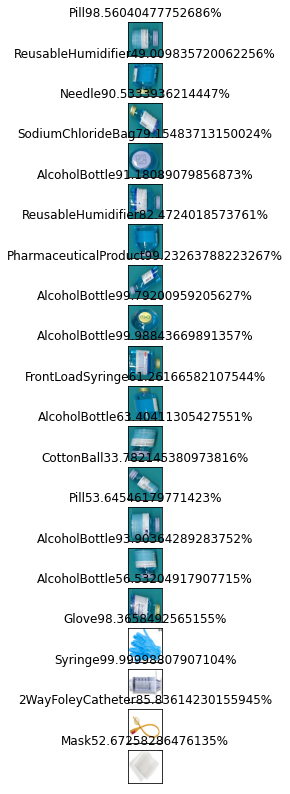

In [38]:
predictImagesFromFilenames(ImgList)